<a href="https://colab.research.google.com/github/Alekhyo/Regression/blob/master/linear_regressionGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
def plotData(x, y):
    '''
      A function to plot a graph between Salary and Year_of_Experience
    '''
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.plot(X, Y, 'ro', ms=8, mec='k',label='Data points')
    plt.ylabel('Salary')
    plt.xlabel('Years in Experience')
    plt.legend(loc='upper left')

# Loading Dataset

In [0]:
data=pd.read_csv('Salary_Data.csv')

In [0]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Analysing Data

In [0]:
data.shape

(30, 2)

In [0]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [0]:
X=data.iloc[:,0].values
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [0]:
Y=data.iloc[:,1].values
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Visualising Data

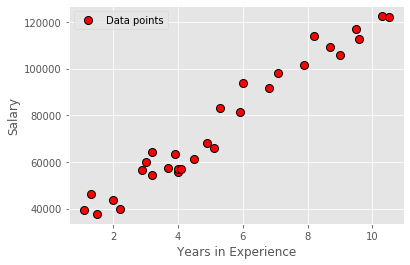

In [0]:
plotData(X,Y)

### Implementing Linear Regression Class using Gradient Descent

In [0]:
class LinearRegression_GD():
    def __init__(self,iterations=1000,lr=0.01):
        self._m=0
        self._b=0
        self._iterations=1000     #Iterations (default)
        self._lr=0.01             #Learning Rate (default)
        
    def fit(self,x,y):            
        """
        
        Iterating to get the global minima for slope and intercept
        
        """
        n=len(x)
        
        for i in range(self._iterations):
            
            derivative_m=(-2/n)*np.sum((y-self._m*x-self._b)*x)
            derivative_b=(-2/n)*np.sum(y-self._m*x-self._b)
            
            self._m=self._m-self._lr*derivative_m       #Calculating step size for slope
            self._b=self._b-self._lr*derivative_b       #Calculating step size for intercept
                
    def predict(self,x):
        """
        
        Predicting the output
        
        """
        y_pred = self._m*x+self._b
        return y_pred
    
    def calculate_r2(self,Y_test,Y_predict):
        '''The formula for r2_score is:
            r2=1-sum(Y_test-Y_predict)^2/sum(Y_test-Y_predict_bar)^2
        '''
        r2=1-(np.sum(np.square(Y_test-Y_predict))/np.sum(np.square(Y_test-Y_predict.mean())))
        return r2
    
    def get_slope(self):
        '''
            Getter Method to return the slope of the line.
        
        '''
        return self._m
    
    def get_intercept(self):
        '''
            Getter Method to return the intercept of the line
        '''
        
        return self._b

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [0]:
lr=LinearRegression_GD()

In [0]:
lr.fit(X_train,Y_train)

In [0]:
y_pred=lr.predict(X_test)

In [0]:
r2=lr.calculate_r2(Y_test,y_pred)
print("The R2 score for the model is ",r2)

The R2 score for the model is  0.9889792450170927


# Plotting the best fit curve

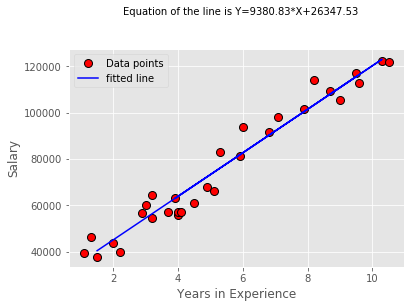

In [0]:
equation='Y='+str(round(lr.get_slope(),2))+'*X+'+str(round(lr.get_intercept(),2))

plotData(X,Y)
plt.plot(X_test,y_pred,color='blue', label='fitted line')
plt.legend(loc='upper left')
plt.figtext(0.25,1,s='Equation of the line is {}'.format(equation))
plt.show()